In [1]:
# General libraries
import pandas as pd
import numpy as np

# Google library
from google.colab import drive

# Graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# Scikit Learn libraries
from sklearn.ensemble import IsolationForest

In [2]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**







In [4]:
# Rosetta data
df_energy = pd.read_csv("data/binding-energy.csv", skiprows=1)

# Prodigy data
df_prodigy = pd.read_csv("data/PRODIGY_dataset.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_prodigy.head()

,PDB,Interacting_chains,Functional_class,DG,DG_pred,Experimental_method,iRMSD,BSA,ICs_charged-charged,ICs_charged-polar,ICs_charged-apolar,ICs_polar-polar,ICS_polar-apolar,ICs_apolar-apolar,NIS_polar,NIS_apolar,NIS_charged
0,1A2K.pdb,C:AB,OG,-9.3,-9.0,ITC,1.11,1603,5,4,20,2,11,25,31.65,41.77,26.58
1,1ACB.pdb,E:I,EI,-13.1,-11.9,spectroscopy,1.08,1544,3,2,19,4,19,25,42.72,38.50,18.78
2,1AK4.pdb,A:D,OX,-6.4,-7.3,ITC,1.33,1029,0,4,14,1,10,20,27.95,45.41,26.64
3,1AKJ.pdb,AB:DE,OX,-5.3,-7.3,SPR,1.14,1995,8,20,7,18,18,2,35.18,35.18,29.64
4,1ATN.pdb,A:D,OX,-12.1,-10.9,spectroscopy,3.28,1774,9,8,20,4,15,28,36.32,34.94,28.74


In [7]:
df_energy.head()

,SCORE:,total_score,Sc,Sc_int_area,complex_normalized,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,dSASA_hphobic,...,pro_close,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,yhh_planarity,description
0,SCORE:,444.725,0.663,1085.279,0.982,-57.376,-3.490,-53.832,-3.274,941.400,...,13.828,21.883,156.096,0.662,-2.461,-68.916,-2.990,-113.607,0.0,1A2K_0001_0001
1,SCORE:,-779.869,0.703,1013.892,-2.603,-51.574,-3.228,-47.449,-2.970,1004.699,...,18.048,-4.169,170.937,0.684,-2.870,-129.149,-2.648,-52.952,0.0,1ACB_0001_0001
2,SCORE:,-743.433,0.826,502.394,-2.601,-41.224,-4.214,-39.342,-4.021,625.914,...,2.425,18.237,96.738,0.824,-3.316,-132.655,2.562,33.305,0.0,1AK4_0001_0001
3,SCORE:,-1789.444,0.677,976.501,-3.020,-64.738,-2.744,-52.629,-2.231,922.508,...,4.945,-12.265,141.633,0.669,-2.721,-144.213,-2.524,-131.230,0.0,1AKJ_0001_0001
4,SCORE:,-1536.843,0.757,1149.468,-2.477,-72.963,-4.054,-70.086,-3.894,1080.449,...,7.541,15.098,225.528,0.716,-2.034,-50.858,-4.335,-208.077,0.0,1ATN_0001_0001


In [8]:
# Remove 'SCORE:' and 'description' column
df_energy.drop(columns=['SCORE:', 'description'], axis=1, inplace=True)

# Add experimental binding energy from Prodigy at Rosetta data
df_energy = df_energy.join(df_prodigy["DG"])

In [9]:
tt = df_energy[:43]
tt.tail()

,total_score,Sc,Sc_int_area,complex_normalized,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,dSASA_hphobic,dSASA_int,...,pro_close,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,yhh_planarity,DG
38,-1531.381,0.598,1026.657,-2.636,-49.960,-2.890,-39.923,-2.309,1024.073,1728.691,...,3.188,34.743,234.466,0.606,-2.629,-115.670,-2.717,-105.980,0.0,-10.0
39,-436.664,0.729,533.817,-2.336,-40.315,-3.952,-33.129,-3.247,597.002,1020.254,...,2.678,8.295,61.002,0.737,-3.632,-61.739,-2.736,-51.983,0.0,-8.9
40,-1746.919,0.645,1147.624,-2.872,-55.365,-2.613,-49.840,-2.352,1159.889,2118.720,...,3.149,-3.795,242.889,0.656,-2.658,-111.637,-2.531,-124.041,0.0,-11.5
41,-647.874,0.750,612.896,-2.579,-46.012,-3.749,-40.663,-3.313,567.325,1227.456,...,0.663,-17.781,54.910,0.756,-3.145,-84.907,-3.161,-50.573,0.0,-7.8
42,-1115.750,0.620,972.497,-2.446,-52.923,-2.358,-44.793,-1.996,1099.644,2244.111,...,5.982,59.436,146.625,0.570,-2.143,-100.740,-2.784,-111.363,0.0,-11.2


# **Preprocessing**

In [10]:
# Is there any missing value?
df_energy.isna().sum().sum()

0

In [11]:
# What is the type of each column?
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_score             81 non-null     float64
 1   Sc                      81 non-null     float64
 2   Sc_int_area             81 non-null     float64
 3   complex_normalized      81 non-null     float64
 4   dG_cross                81 non-null     float64
 5   dG_cross/dSASAx100      81 non-null     float64
 6   dG_separated            81 non-null     float64
 7   dG_separated/dSASAx100  81 non-null     float64
 8   dSASA_hphobic           81 non-null     float64
 9   dSASA_int               81 non-null     float64
 10  dSASA_polar             81 non-null     float64
 11  ddg                     81 non-null     float64
 12  delta_unsatHbonds       81 non-null     float64
 13  dslf_fa13               81 non-null     float64
 14  fa_atr                  81 non-null     floa

In [12]:
# Are all columns with significant value?
df_energy.describe()

,total_score,Sc,Sc_int_area,complex_normalized,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,dSASA_hphobic,dSASA_int,...,pro_close,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,yhh_planarity,DG
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000
mean,-435.168099,0.666494,897.491889,-1.601049,-22.752481,0.707519,-14.351778,1.245469,872.808605,1598.450235,...,5.814988,19.847259,143.811099,0.667605,-1.920852,-76.841568,-1.580765,-67.948593,0.0,-10.102469
std,4168.617213,0.097036,317.803502,6.000509,228.935198,33.498220,229.998251,33.752094,273.851156,505.135818,...,5.445572,38.039746,85.389294,0.092256,6.065878,137.410506,8.957581,126.854233,0.0,2.800267
min,-3544.831000,0.124000,4.517000,-3.375000,-90.020000,-4.826000,-75.441000,-4.429000,22.553000,92.034000,...,0.190000,-35.724000,-29.913000,0.380000,-4.261000,-219.022000,-4.335000,-208.077000,0.0,-18.600000
25%,-1417.435000,0.619000,685.957000,-2.832000,-55.365000,-3.409000,-48.283000,-2.912000,703.955000,1287.624000,...,2.441000,-4.169000,79.294000,0.606000,-2.996000,-113.363000,-3.118000,-105.980000,0.0,-11.700000
50%,-1022.457000,0.676000,905.281000,-2.601000,-46.012000,-2.937000,-38.943000,-2.457000,821.919000,1513.721000,...,4.047000,8.433000,143.397000,0.671000,-2.658000,-85.230000,-2.717000,-78.053000,0.0,-10.100000
75%,-666.232000,0.723000,1085.279000,-2.336000,-38.315000,-2.593000,-29.593000,-1.996000,1017.844000,1808.218000,...,7.799000,40.341000,198.872000,0.734000,-2.143000,-60.853000,-2.303000,-55.074000,0.0,-7.500000
max,26671.031000,0.842000,1671.873000,43.970000,2007.627000,298.420000,2026.338000,301.201000,1571.880000,3065.071000,...,34.876000,186.962000,486.052000,0.953000,51.635000,1084.334000,77.600000,1008.802000,0.0,-4.300000


In [ ]:
# Remove 'packstat' and 'yhh_planarity' because are constant
df_energy.drop(columns=['packstat', 'yhh_planarity'], axis=1, inplace=True)

# **EDA**


## Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1f5e9db10>,
      dtype=object)

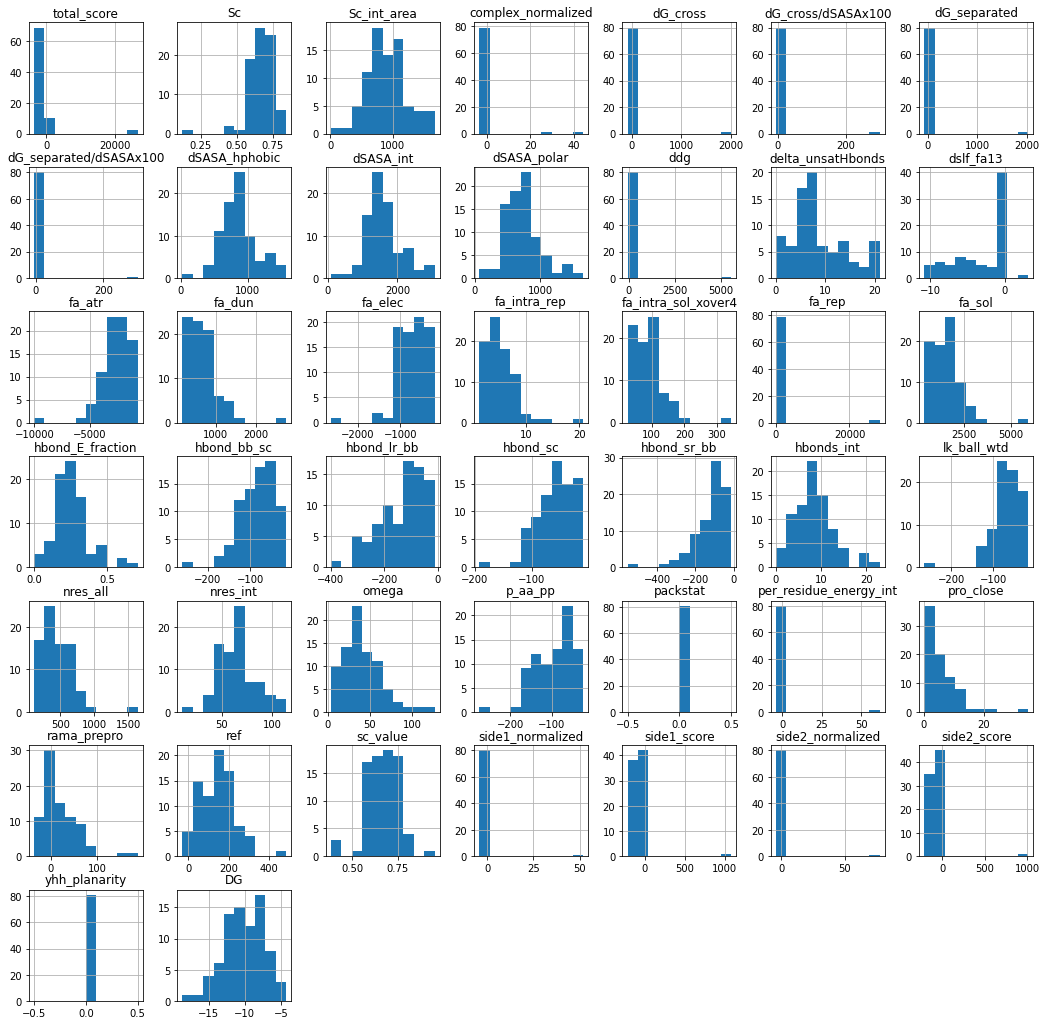

In [13]:
df_energy.hist(figsize=(18, 18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1f1290d10>,
      dtype=object)

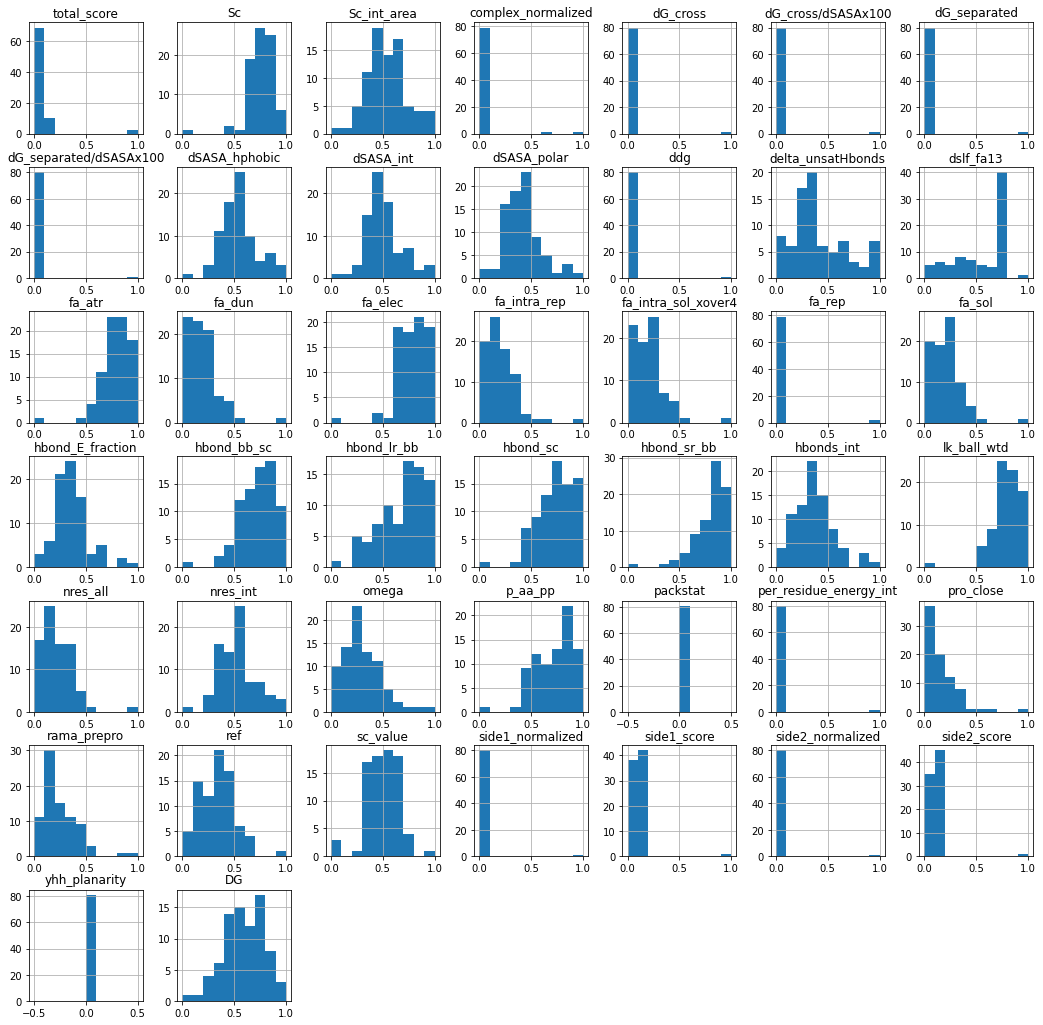

In [18]:
from sklearn.preprocessing import MinMaxScaler

df_scaler = df_energy.copy()

scaler = MinMaxScaler()

df_new = scaler.fit_transform(df_scaler)

cols = df_scaler.columns

df_plot = pd.DataFrame(data=df_new, columns=cols)

df_plot.hist(figsize=(18, 18))


It is important understand/investigate why some features have a distribuition similar to Bernoulli. 

In [ ]:
# Which index indicate a king of outlier
print(df_energy[df_energy['dG_cross']>1000].index)
print(df_energy[df_energy['dG_separated']>1000].index)
print(df_energy[df_energy['side1_score']>1000].index)
print(df_energy[df_energy['side1_normalized']>40].index)
print(df_energy[df_energy['side2_score']>500].index)
print(df_energy[df_energy['side2_normalized']>50].index)
print(df_energy[df_energy['per_residue_energy_int']>30].index)
print()
print(df_energy[df_energy['total_score']>20000].index)
print(df_energy[df_energy['ddg']>50].index)
print()
print(df_energy[df_energy['complex_normalized']>30].index)
print(df_energy[df_energy['fa_rep']>28000].index)
print()
print(df_energy[df_energy['fa_sol']>5000].index)
print(df_energy[df_energy['fa_atr']<-8000].index)
print(df_energy[df_energy['fa_dun']>2000].index)
print(df_energy[df_energy['fa_elec']<-2000].index)
print(df_energy[df_energy['fa_intra_rep']>15].index)
print(df_energy[df_energy['fa_intra_sol_xover4']>300].index)
print(df_energy[df_energy['hbond_E_fraction']>0.6].index)
print(df_energy[df_energy['hbond_bb_sc']<-200].index)
print(df_energy[df_energy['hbond_lr_bb']<-350].index)
print(df_energy[df_energy['hbond_sc']<-150].index)
print(df_energy[df_energy['hbond_sr_bb']<-400].index)
print(df_energy[df_energy['lk_ball_wtd']<-200].index)
print(df_energy[df_energy['nres_all']>1500].index)
print(df_energy[df_energy['p_aa_pp']<-200].index)
print(df_energy[df_energy['ref']>400].index)
print()
print(df_energy[df_energy['dslf_fa13']>0].index)
print(df_energy[df_energy['pro_close']>30].index)

Int64Index([28], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([28], dtype='int64')

Int64Index([14, 28], dtype='int64')
Int64Index([14, 28], dtype='int64')

Int64Index([14], dtype='int64')
Int64Index([14], dtype='int64')

Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')

Int64Index([4], dtype='int64')
Int64Index([23], dtype='int64')


The elements that need to be investigate are:
- 28: 1GXD_0001_0001
- 14: 1DE4_0001_0001
- 12: 1E4K_0001_0001

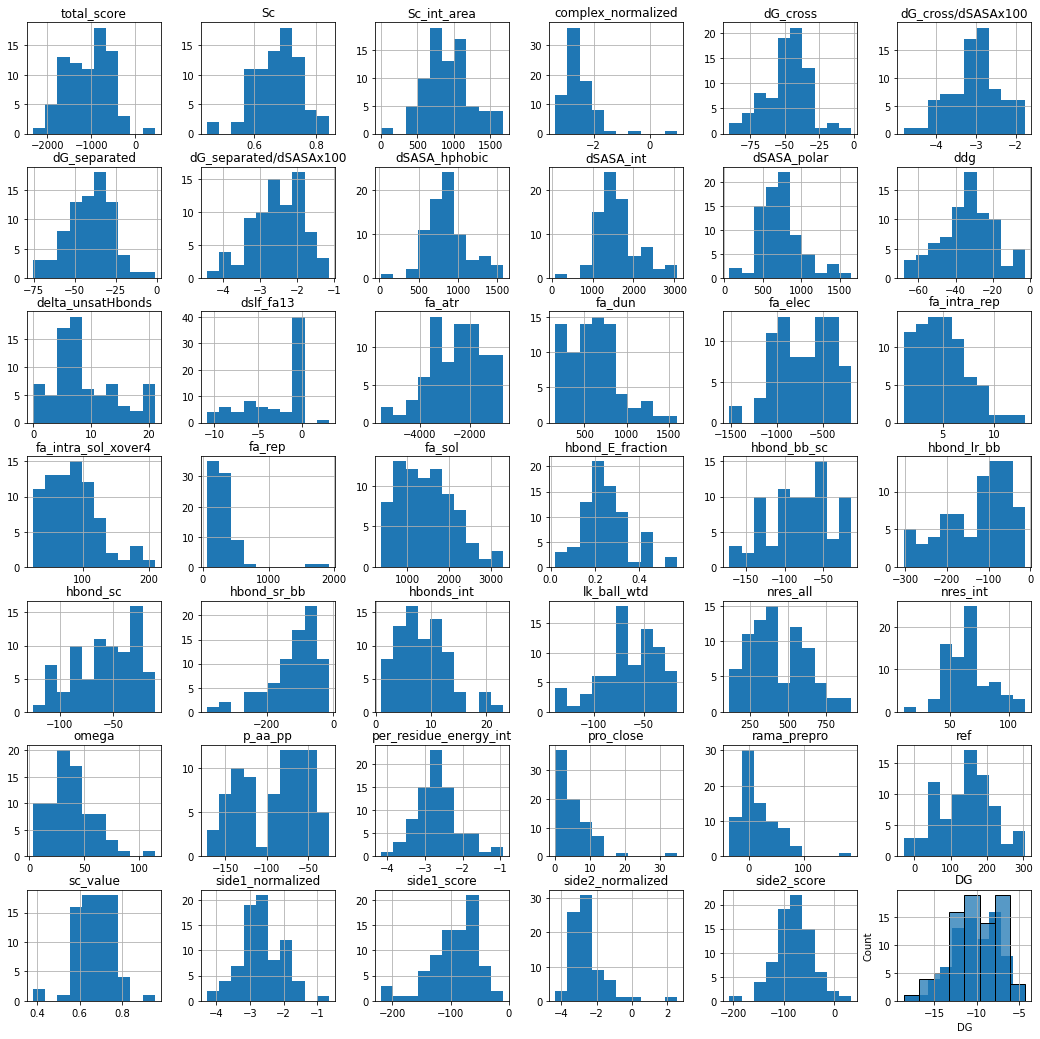

In [ ]:
df_energy.drop([28, 14, 12], axis=0).hist(figsize=(18, 18))
sns.histplot(data=df_energy, x="DG")

## Correlation

In [ ]:
# Heatmap of correlation matrix
corr = df_energy.corr()
data = [go.Heatmap( z=corr.values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')]
iplot(data, filename='pandas-heatmap')

In [ ]:
new_corr = corr.applymap(lambda x: np.NaN if (abs(x) < 0.9 or x == 1) else x)
data = [go.Heatmap( z=new_corr.values, x=list(new_corr.columns), y=list(new_corr.index), colorscale='Viridis')]
iplot(data, filename='pandas-heatmap')

In [ ]:
# Tuples with high correlation
#lista = corr.unstack().sort_values().drop_duplicates()
#for index, value in lista.items():
#  if (abs(value) > 0.9 and value < 1):
#    print(str(index) + " " + str(value))

In [ ]:
# Heatmap of correlation matrix after remove outliers
corr = df_energy.drop([28, 14, 12], axis=0).corr()
data = [go.Heatmap( z=corr.values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')]
iplot(data, filename='pandas-heatmap')

In [ ]:
new_corr = corr.applymap(lambda x: np.NaN if (abs(x) < 0.9 or abs(x) == 1) else x)
data = [go.Heatmap( z=new_corr.values, x=list(new_corr.columns), y=list(new_corr.index), colorscale='Viridis')]
iplot(data, filename='pandas-heatmap')

Some correlation regions disappear
- side vs. DG_, problably because we remove #28
- side vs. side
- side vs. ddg
- side vs. per_residue 
- DG_ vs. per_residue
- DG_ vs. ddg
- DG_ vs. DG_

That makes sense? In other words, the correlations didn't really exist. To explain, it is necessary understand what that features means.

However, we didn't find explanation at Rosseta paper about
- side
- DG_
- ddg
- per_residue

Let's talk with Matheus about that.


# **Outliers**

In [ ]:
# DBSCAN, InterQuartile Range, Z-score, Local Outlier factor, OneClassSVM
# https://scikit-learn.org/stable/modules/outlier_detection.html

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=42)
df = df_energy.drop(columns=['DG'])
model.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=42)

In [ ]:
anomaly_score = model.predict(df)
scores = model.decision_function(df)

df['anomaly_score'] = anomaly_score
df['scores'] = scores
df[df['anomaly_score']==-1][['scores']].sort_values(by=['scores'])

,scores
28,-0.301443
12,-0.256578
14,-0.081814
21,-0.046498
70,-0.038241
29,-0.027419
30,-0.015663
36,-0.003057


In [ ]:
pip install eif

In [ ]:
#https://towardsdatascience.com/outlier-detection-with-extended-isolation-forest-1e248a3fe97b
import eif as iso

In [ ]:
X = df_energy.drop(columns=['DG'])
F1  = iso.iForest(X.values, ntrees=100, sample_size=256, ExtensionLevel=0)

NameError: ignored

In [ ]:
anomaly_scores = F1.compute_paths(X_in = X.values)

In [ ]:
F1.compute_paths()

,total_score,Sc,Sc_int_area,complex_normalized,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,dSASA_hphobic,dSASA_int,dSASA_polar,ddg,delta_unsatHbonds,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_E_fraction,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hbonds_int,lk_ball_wtd,nres_all,nres_int,omega,p_aa_pp,per_residue_energy_int,pro_close,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score
0,444.725,0.663,1085.279,0.982,-57.376,-3.490,-53.832,-3.274,941.400,1644.020,702.620,-53.298,6.0,0.000,-2604.971,683.743,-836.649,5.108,90.106,1918.403,1508.391,0.152,-65.152,-152.159,-69.142,-136.380,7.0,-55.359,444.0,66.0,54.608,-87.629,-2.765,13.828,21.883,156.096,0.662,-2.461,-68.916,-2.990,-113.607
1,-779.869,0.703,1013.892,-2.603,-51.574,-3.228,-47.449,-2.970,1004.699,1597.865,593.166,-47.650,14.0,-5.580,-1743.120,365.698,-444.434,4.571,47.877,213.774,921.763,0.170,-54.746,-115.458,-30.533,-59.348,7.0,-49.764,301.0,65.0,54.513,-69.899,-2.802,18.048,-4.169,170.937,0.684,-2.870,-129.149,-2.648,-52.952
2,-743.433,0.826,502.394,-2.601,-41.224,-4.214,-39.342,-4.021,625.914,978.290,352.376,-33.220,2.0,0.000,-1688.550,354.182,-493.046,3.131,55.312,172.991,1009.050,0.182,-65.004,-62.899,-39.610,-108.493,8.0,-36.538,290.0,53.0,114.336,-75.694,-1.875,2.425,18.237,96.738,0.824,-3.316,-132.655,2.562,33.305
3,-1789.444,0.677,976.501,-3.020,-64.738,-2.744,-52.629,-2.231,922.508,2359.330,1436.822,-37.599,12.0,-5.134,-3456.950,843.585,-1026.693,6.074,116.449,367.849,1979.466,0.407,-111.625,-249.213,-98.663,-111.945,19.0,-81.999,602.0,105.0,39.842,-134.800,-2.623,4.945,-12.265,141.633,0.669,-2.721,-144.213,-2.524,-131.230
4,-1536.843,0.757,1149.468,-2.477,-72.963,-4.054,-70.086,-3.894,1080.449,1799.719,719.270,-60.039,8.0,3.099,-3843.617,1002.267,-1034.767,8.430,127.292,444.028,2225.659,0.221,-95.597,-166.721,-77.261,-209.904,12.0,-100.695,629.0,73.0,64.915,-132.138,-3.547,7.541,15.098,225.528,0.716,-2.034,-50.858,-4.335,-208.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-495.452,0.704,1051.939,-2.613,-54.296,-3.240,-43.985,-2.624,805.540,1676.050,870.511,-35.236,10.0,0.000,-1095.392,294.140,-400.818,1.802,45.461,107.354,804.001,0.302,-55.521,-24.117,-28.134,-79.886,10.0,-32.711,194.0,60.0,40.971,-40.341,-2.475,2.778,-5.126,-29.913,0.695,-3.426,-106.221,-1.457,-42.255
77,-747.993,0.563,771.058,-2.268,-35.387,-2.338,-24.132,-1.594,892.159,1513.721,621.561,-2.521,16.0,-1.272,-1939.637,562.787,-581.561,4.930,79.325,224.836,1218.181,0.285,-80.594,-123.655,-41.200,-49.282,6.0,-55.306,343.0,63.0,39.957,-80.906,-1.829,5.334,11.291,58.779,0.592,-2.500,-69.988,-1.293,-45.263
78,-1851.878,0.648,987.582,-3.030,-54.439,-3.126,-47.164,-2.708,924.975,1741.515,816.540,-33.150,8.0,0.000,-3644.920,811.513,-1072.072,6.557,122.002,390.841,2146.262,0.235,-132.809,-161.361,-89.361,-186.913,11.0,-95.788,616.0,72.0,50.983,-141.517,-2.837,2.912,-35.724,177.517,0.632,-3.140,-141.309,-2.331,-62.949
79,-753.916,0.762,755.903,-3.227,-52.341,-4.065,-49.145,-3.817,749.443,1287.624,538.180,-45.906,8.0,-5.746,-1314.616,203.916,-400.787,1.779,35.803,137.071,773.650,0.192,-65.658,-106.371,-31.585,-40.675,7.0,-30.244,235.0,69.0,11.278,-70.689,-3.518,2.441,4.254,142.263,0.767,-3.743,-183.402,-2.966,-59.314


# **Nanobodies Complex**

In [ ]:
df_vhhs = pd.read_csv("data/vhhs2.csv")
df_vhhs.drop(columns=['description', 'packstat', 'yhh_planarity'], axis=1, inplace=True)

In [ ]:
df_vhhs.head()

,total_score,Sc,Sc_int_area,complex_normalized,dG_cross,dG_cross/dSASAx100,dG_separated,dG_separated/dSASAx100,dSASA_hphobic,dSASA_int,dSASA_polar,ddg,delta_unsatHbonds,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_E_fraction,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hbonds_int,lk_ball_wtd,nres_all,nres_int,omega,p_aa_pp,per_residue_energy_int,pro_close,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,DG
0,638.562,0.694,627.053,1.921,-33.306,-3.042,-31.416,-2.870,654.851,1094.692,439.841,62.508,9,-6.240,-1361.439,1150.389,-359.753,2.840,48.276,357.349,856.569,0.166,-37.553,-86.329,-16.670,-29.519,5,-18.575,248,53,10.461,-32.706,-1.356,2.231,68.195,91.034,0.679,-1.291,-33.558,-1.418,-38.294,-10.17
1,-751.911,0.728,664.629,-3.046,-44.252,-3.957,-37.865,-3.386,629.779,1118.438,488.659,-39.682,7,-5.026,-1453.191,323.708,-432.570,2.430,50.141,152.126,852.369,0.239,-60.346,-86.127,-43.956,-60.360,7,-34.959,251,56,8.604,-60.265,-3.255,1.665,-23.403,117.250,0.727,-3.247,-100.654,-3.266,-81.642,-12.17
2,-790.880,0.755,721.587,-3.133,-45.522,-3.145,-42.749,-2.953,552.034,1447.481,895.447,-42.027,12,-7.476,-1442.444,276.328,-441.520,2.407,45.958,153.618,862.877,0.312,-63.626,-80.705,-46.879,-69.748,10,-33.615,253,62,8.561,-61.044,-3.132,0.532,-24.303,130.199,0.678,-3.378,-94.596,-2.929,-99.576,-11.65
3,-735.450,0.695,886.831,-2.934,-45.323,-2.747,-39.445,-2.391,726.615,1649.888,923.272,-35.592,5,-7.224,-1425.598,272.301,-403.255,2.390,47.978,154.247,842.930,0.348,-55.377,-78.867,-46.738,-66.961,10,-39.974,252,64,13.721,-56.891,-2.857,0.515,-13.582,124.936,0.693,-3.138,-97.279,-2.593,-85.565,-13.80
4,-731.468,0.759,833.826,-2.971,-50.956,-3.416,-47.993,-3.218,615.130,1491.459,876.329,-42.808,7,-5.513,-1435.301,298.627,-425.086,2.545,46.408,155.285,854.601,0.313,-51.368,-85.446,-47.631,-64.913,14,-34.722,248,62,7.021,-55.294,-3.351,0.534,-15.811,124.596,0.754,-3.100,-83.695,-3.546,-124.098,-10.91


In [ ]:
# Is there any missing value?
df_vhhs.isna().sum().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac9abfe50>,
      dtype=object)

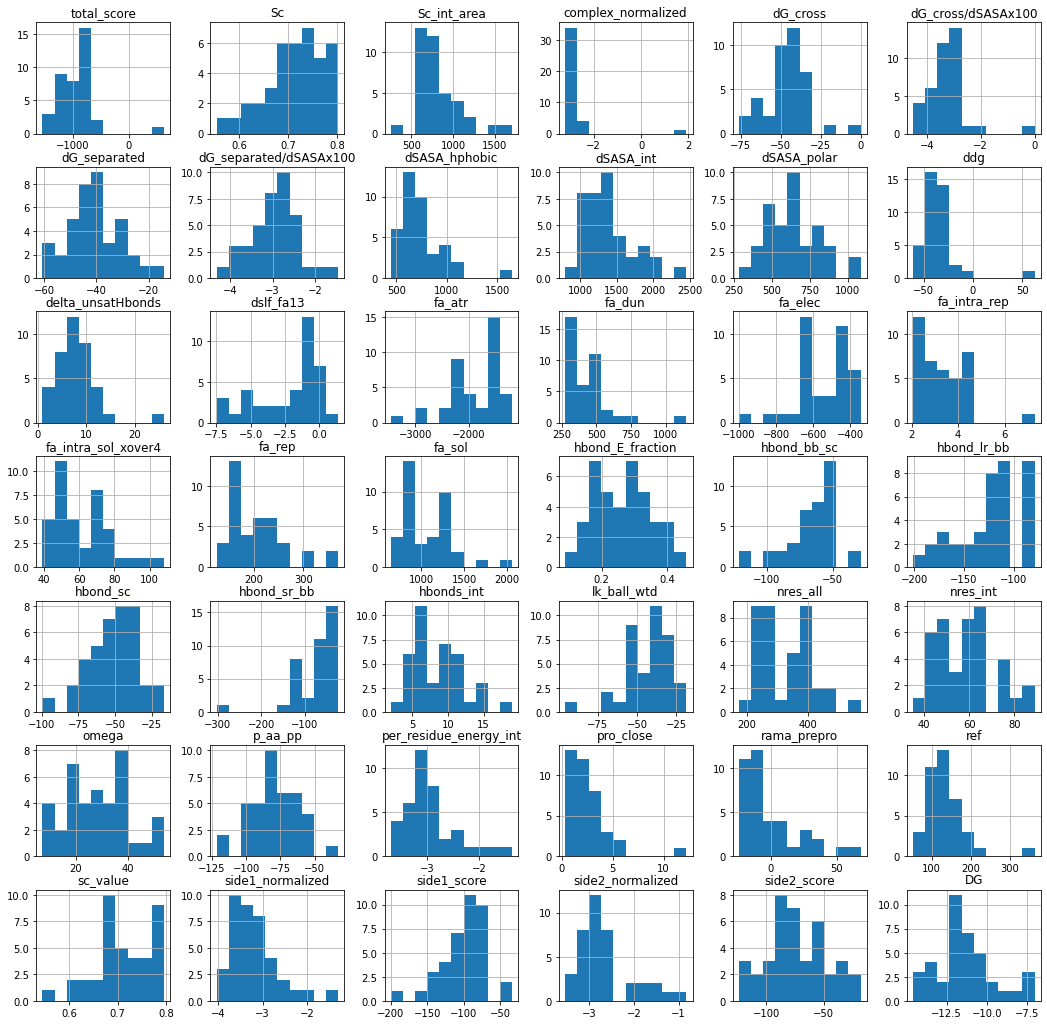

In [ ]:
df_vhhs.hist(figsize=(18, 18))

In [ ]:
# Which index indicate a king of outlier
print(df_vhhs[df_vhhs['total_score']>0].index)
print(df_vhhs[df_vhhs['ddg']>0].index)
print(df_vhhs[df_vhhs['complex_normalized']>0].index)
print(df_vhhs[df_vhhs['fa_dun']>1000].index)
print()
print(df_vhhs[df_vhhs['fa_sol']>1500].index)
print(df_vhhs[df_vhhs['fa_intra_rep']>6].index)
print(df_vhhs[df_vhhs['hbond_sr_bb']<-200].index)
print(df_vhhs[df_vhhs['lk_ball_wtd']<-75].index)
print(df_vhhs[df_vhhs['ref']>300].index)
print()
print(df_vhhs[df_vhhs['pro_close']>10].index)

Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')

Int64Index([16, 35], dtype='int64')
Int64Index([16], dtype='int64')
Int64Index([16], dtype='int64')
Int64Index([16], dtype='int64')
Int64Index([16], dtype='int64')

Int64Index([8], dtype='int64')


In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=42)
df = df_vhhs.drop(columns=['DG'])
model.fit(df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [ ]:
anomaly_score = model.predict(df)
scores = model.decision_function(df)

df['anomaly_score'] = anomaly_score
df['scores'] = scores
df[df['anomaly_score']==-1][['scores']].sort_values(by=['scores'])

,scores
16,-0.123229
0,-0.050786
20,-0.015543
10,-0.006509
